### **goEmotions dataset exploration**

notebook explores the GoEmotions dataset used for emotion classification.

goal is to:
- understand dataset structure
- inspect emotion labels
- verify sample texts and annotations

no preprocessing or training is done here.

In [1]:
from datasets import load_dataset
import pandas as pd

c:\Ibrahim\Personal\University Stuff\Knowledge Representation & Reasoning\KRR Project\Neuro-Symbolic-Emotion-Movie-Recommender-KG\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("go_emotions")

ds

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

In [3]:
#inspecting dataset splits
print("train size:", len(ds['train']))
print("validation size:", len(ds['validation']))
print("test size:", len(ds['test']))

train size: 43410
validation size: 5426
test size: 5427


In [4]:
#inspecting a few examples
for i in range(3):
    print(ds["train"][i])
    print()

{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}

{'text': 'Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead', 'labels': [27], 'id': 'ed00q6i'}

{'text': 'WHY THE FUCK IS BAYLESS ISOING', 'labels': [2], 'id': 'eezlygj'}



In [5]:
#understanding the label mapping
label_names = ds["train"].features["labels"].feature.names
len(label_names), label_names

(28,
 ['admiration',
  'amusement',
  'anger',
  'annoyance',
  'approval',
  'caring',
  'confusion',
  'curiosity',
  'desire',
  'disappointment',
  'disapproval',
  'disgust',
  'embarrassment',
  'excitement',
  'fear',
  'gratitude',
  'grief',
  'joy',
  'love',
  'nervousness',
  'optimism',
  'pride',
  'realization',
  'relief',
  'remorse',
  'sadness',
  'surprise',
  'neutral'])

In [6]:
#mapping label indices to names
def decode_labels(label_ids):
    return [label_names[i] for i in label_ids]

sample = ds["train"][0]
print("text: ", sample["text"])
print("label ids: ", sample["labels"])
print("decoded labels: ", decode_labels(sample["labels"]))

text:  My favourite food is anything I didn't have to cook myself.
label ids:  [27]
decoded labels:  ['neutral']


this is the bridge between ML & semantics.

In [7]:
#label frquency overview

from collections import Counter

counter = Counter()
for ex in ds["train"]:
    counter.update(ex["labels"])
    
label_freq = {label_names[k]: v for k, v in counter.items()}
pd.Series(label_freq).sort_values(ascending=False).head(10)

neutral        14219
admiration      4130
approval        2939
gratitude       2662
annoyance       2470
amusement       2328
curiosity       2191
love            2086
disapproval     2022
optimism        1581
dtype: int64

dataset is not emotionally uniform.

dataset exhibits a skewed label distribution, with emotions such as neutral and admiration appearing significantly more frequently than others. 

this imbalance introduces a frequency bias, where classifiers trained on the dataset are more likely to favor dominant emotional categories.

In [9]:
freq_ds = (
    pd.DataFrame(label_freq.items(), columns=["Emotion", "Frequency"]).sort_values(by="Frequency", ascending=False)
)

freq_ds.head(20)

,Emotion,Frequency
0,neutral,14219
8,admiration,4130
11,approval,2939
5,gratitude,2662
3,annoyance,2470
10,amusement,2328
18,curiosity,2191
20,love,2086
22,disapproval,2022
7,optimism,1581


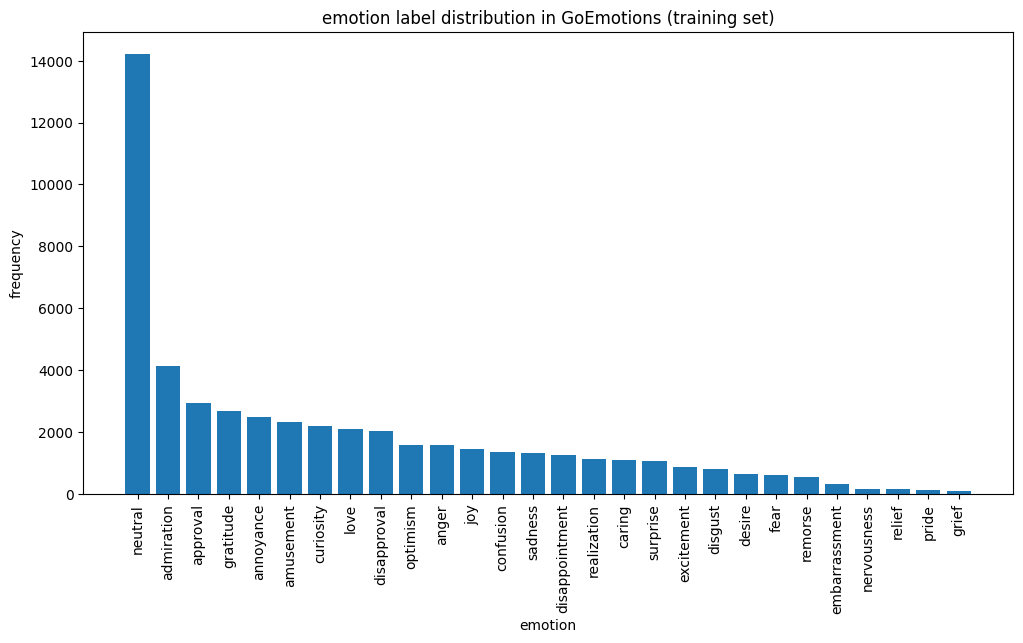

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(freq_ds["Emotion"], freq_ds["Frequency"])
plt.xticks(rotation=90)
plt.title("emotion label distribution in GoEmotions (training set)")
plt.xlabel("emotion")
plt.ylabel("frequency")
plt.show()

### **interpretation**

the distribution shows a strong imbalance across emotion labels. A small number of
emotions (e.g., *neutral*, *admiration*) dominate the dataset, while several fine-grained
emotions occur relatively rarely. this frequency imbalance introduces bias in supervised
emotion classifiers, which tend to favor dominant classes and underperform on rare ones.

such bias motivates the use of a knowledge graph with hierarchical emotion representations,
allowing fine-grained emotions to be semantically generalized (e.g., *remorse* ⊑ *sadness*)
during reasoning, even when the classifier confidence is low.